# Fuzzy logic task

Define a fuzzy controller for a distance to stop system for cars.

Also define the functions for each input, e. g. $$f_{light}(x) = min(2x, 1)$$
Write everything with Python code and visualize your results!
You can alternatively visualize it on paper.
Use center of gravity to calculate the final result.

The following information is provided:

## Inputs

### 1. Speed of vehicle
#### Set of terms
- slow
- medium
- fast


The terms are in range [0, 100]

### 2. (Own) Car weight

#### Set of terms
- light
- medium
- heavy

The terms are in range [0, 100]

## Output

## Distance to full stop

#### Set of terms
- very low
- low
- medium
- high
- very high 

The terms are in range [0, 3] ($\times$10meters)

## Inference rules

| Id 	| Speed 	| Car weight 	| Distance 	|  
|:---:	|:--------:	|:------------:	|:--------:	|  
| 1 	| slow 	    | light     	| very low 	|  
| 2 	| slow   	| medium 	    | low    	|  
| 3 	| slow  	| heavy     	| medium  	|  
| 4 	| medium 	| light     	| low   	|  
| 5 	| medium 	| medium    	| medium 	|  
| 6 	| medium 	| heavy     	| high   	|  
| 7 	| fast  	| light 	    | medium 	|  
| 8 	| fast  	| medium    	| high  	|  
| 9 	| fast  	| heavy 	    | very high 	|  

## Question

Calculate the distance for

1) Speed = 30

2) Car weight = 60

In [1]:
# Functions
def generate_range_section(ditem: dict, drange: tuple):
    """
    Create intervals and midpoint with respect to keys
    """

    len_dict = len(ditem)  # length of dictionary
    interval = (drange[1] - drange[0]) / (len_dict - 1)  # interval

    keys = list(ditem.keys())
    for i in range(len(keys)):
        # First key in dictionary
        if i == 0:
            ditem[keys[i]] = {
                # Range: (Start, midpoint=Start, 1st interval)
                "range": (drange[0], drange[0], drange[0] + interval),
            }
        # Last key in dictionary
        elif i == len(keys)-1:
            ditem[keys[i]] = {
                # Range: (Last interval, midpoint=End, End)
                "range": (drange[1] - interval, drange[1], drange[1]),
            }
        # For other keys
        else:
            # Find midpoint of triangle
            midpoint = i/(len(ditem) - 1) * (drange[1] - drange[0])
            ditem[keys[i]] = {
                # Range: (midpoint - ith interval, midpoint, midpoint + ith interval)
                "range": (midpoint - interval, midpoint, midpoint + interval),
            }

    return ditem


def find_probability(ditem: dict, value: int):
    """
    Find probability corresponding to inputs: speed and weight
    """
    plist = []  # probability list

    for dkey, dvalues in ditem.items():
        if isinstance(dvalues, dict):
            dmin, midpoint, dmax = list(dvalues.values())[0]  # unpacking of value

            if dmin <= value and value <= dmax:  # if value is within interval
                if value < midpoint:
                    p = (value - dmin) / (midpoint - dmin)
                elif value > midpoint:
                    p = (dmax - value) / (dmax - midpoint)
                else:
                    p = 1
                plist.append(p)
            else:
                plist.append(0)  # else, append 0 probability

    return plist


def get_distance_key(speed_key, weight_key):
    """
    With the inference rules, find the corresponding distance key with speed_input and weight_input
    """

    inference = {
        ("slow", "light"): "very low",
        ("slow", "medium"): "low",
        ("slow", "heavy"): "medium",
        ("medium", "light"): "low",
        ("medium", "medium"): "medium",
        ("medium", "heavy"): "high",
        ("fast", "light"): "medium",
        ("fast", "medium"): "high",
        ("fast", "heavy"): "very high",
    }
    return inference[(speed_key, weight_key)]

def dict_append_pvalue(d: dict, p_value: list):
    """Add probability value to dictionary"""

    i = 0
    for key, value in d.items():
        d[key]["p value"] = p_value[i]
        i += 1
    return d

def get_distance_pvalue(speed, weight, distance):
    """Get distance p_value with reference to inference"""

    for speed_key in speed.keys():
        for weight_key in weight.keys():
            dist_key = get_distance_key(speed_key, weight_key) # Get corresponding distance key based on inference rule

            if "p value" in distance[dist_key].keys(): # Maximise distance p value
                distance[dist_key]["p value"] = max(distance[dist_key]["p value"], 
                                                    min(speed[speed_key]["p value"], weight[weight_key]["p value"]))
            else:
                distance[dist_key]["p value"] = min(speed[speed_key]["p value"], weight[weight_key]["p value"])
    
    return distance

In [2]:
# Initialise
speed = {
    "slow": None,
    "medium": None,
    "fast": None,
}

weight = {
    "light": None,
    "medium": None,
    "heavy": None,
}

distance = {
    "very low": None,
    "low": None,
    "medium": None,
    "high": None,
    "very high": None,
}

speed_min, speed_max = 0, 100
weight_min, weight_max = 0, 100
distance_min, distance_max = 0, 3

speed_input = 30
weight_input = 60

# Fuzzification
speed = generate_range_section(speed, (speed_min, speed_max))
weight = generate_range_section(weight, (weight_min, weight_max))
distance = generate_range_section(distance, (distance_min, distance_max))

# Find probability of speed and weight inputs
speed_p = find_probability(speed, value=speed_input) # slow, medium, light
weight_p = find_probability(weight, value=weight_input) # light, medium, light

# Add probability of inputs into speed and weight dictionary
speed = dict_append_pvalue(speed, speed_p)
weight = dict_append_pvalue(weight, weight_p)

# Get distance value
distance = get_distance_pvalue(speed, weight, distance)

In [10]:
print("Speed")
for key, value in speed.items():
    print(f"{key}\t{value}")

print('-'*10)

print("Weight")
for key, value in weight.items():
    print(f"{key}\t{value}")

print('-'*10)

print("Distance")
for key, value in distance.items():
    print(f"{key:10s}\t{value}")

Speed
slow	{'range': (0, 0, 50.0), 'p value': 0.4}
medium	{'range': (0.0, 50.0, 100.0), 'p value': 0.6}
fast	{'range': (50.0, 100, 100), 'p value': 0}
----------
Weight
light	{'range': (0, 0, 50.0), 'p value': 0}
medium	{'range': (0.0, 50.0, 100.0), 'p value': 0.8}
heavy	{'range': (50.0, 100, 100), 'p value': 0.2}
----------
Distance
very low  	{'range': (0, 0, 0.75), 'p value': 0}
low       	{'range': (0.0, 0.75, 1.5), 'p value': 0.4}
medium    	{'range': (0.75, 1.5, 2.25), 'p value': 0.6}
high      	{'range': (1.5, 2.25, 3.0), 'p value': 0.2}
very high 	{'range': (2.25, 3, 3), 'p value': 0}


In [4]:
import numpy as np

def p_function(x, range):
    """Generate a distribution for matplotlib.pyplot x-axis, and corresponding p values
    """
    dmin, midpoint, dmax = range

    if dmin == midpoint:  # Start triangle
        return np.where(x <= dmax, ((dmax - x) / dmax), 0)

    elif dmax == midpoint:  # End triangle
        return np.where(x <= dmin, 0, ((x - dmin) / (midpoint - dmin)))

    else:  # Other full triangles
        return np.where(np.logical_and(dmin <= x, x <= dmax),
                        np.where(x <= midpoint,
                                 # left of midpoint
                                 (x - dmin) / (midpoint - dmin),
                                 # right of midpoint
                                 (dmax - x) / (dmax - midpoint)),
                        0)

def numpy_max (input_list: list):
    """ Find max value of all arrays in the given input list """
    np_max = np.zeros_like(input_list[0]) # initialise

    for i in input_list:
        np_max = np.maximum(np_max, i)
    
    return np_max

# To generate speed graph
x = np.arange(start=speed_min,
              stop=speed_max + (speed_max - speed_min)/100,
              step=(speed_max - speed_min)/100)
speed_slow = p_function(x, speed["slow"]["range"])
speed_medium = p_function(x, speed["medium"]["range"])
speed_fast = p_function(x, speed["fast"]["range"])

# To generate weight graph
y = np.arange(start=weight_min,
              stop=weight_max + (weight_max - weight_min)/100,
              step=(weight_max - weight_min)/100)
weight_light = p_function(y, weight["light"]["range"])
weight_medium = p_function(y, weight["medium"]["range"])
weight_heavy = p_function(y, weight["heavy"]["range"])

# To generate distance graph
z = np.arange(start=distance_min,
              stop=distance_max + (distance_max - distance_min)/100,
              step=(distance_max - distance_min)/100)
distance_very_low = p_function(z, distance["very low"]["range"])
distance_low = p_function(z, distance["low"]["range"])
distance_medium = p_function(z, distance["medium"]["range"])
distance_high = p_function(z, distance["high"]["range"])
distance_very_high = p_function(z, distance["very high"]["range"])

# Find max value in the distance distribution
distance_aggregate_area = numpy_max(
    [np.minimum(distance["very low"]["p value"], distance_very_low),
    np.minimum(distance["low"]["p value"], distance_low),
    np.minimum(distance["medium"]["p value"], distance_medium),
    np.minimum(distance["high"]["p value"], distance_high),
    np.minimum(distance["very high"]["p value"], distance_very_high),]
)

# Find center of gravity (weight average)
center_of_gravity = np.average(z, weights=distance_aggregate_area) 
print(center_of_gravity)


1.375


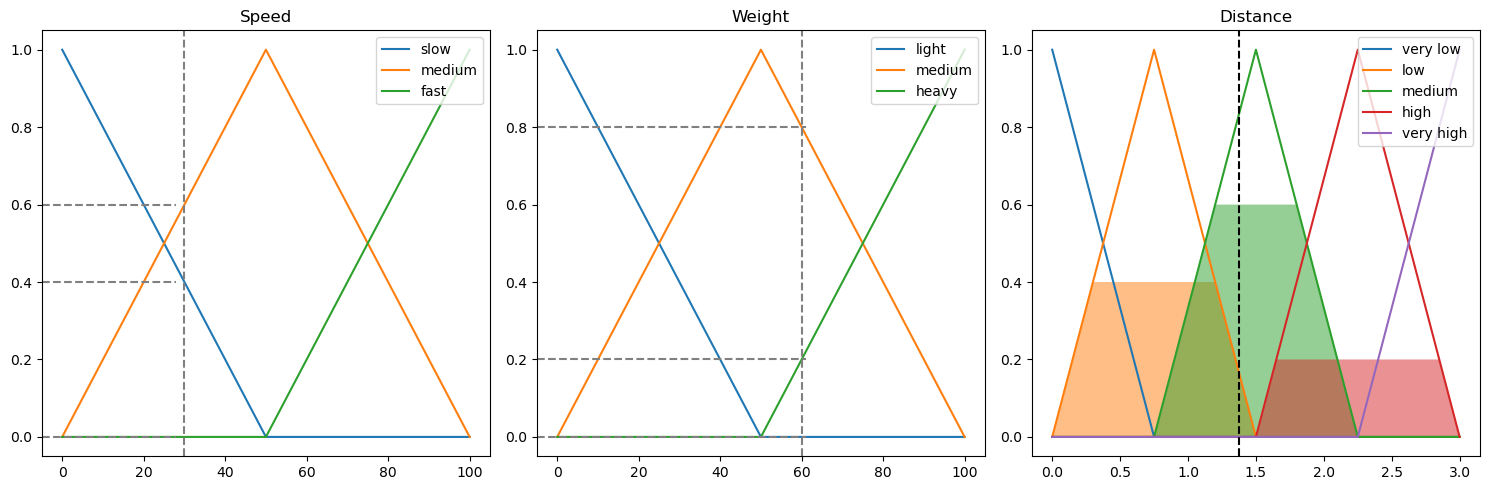

For speed=30 and weight=60, the distance is 13.75 meters.


In [5]:
import matplotlib.pyplot as plt

## To Generate Graph
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting Speed
axs[0].plot(x, speed_slow, label="slow")
axs[0].plot(x, speed_medium, label="medium")
axs[0].plot(x, speed_fast, label="fast")
axs[0].set_title("Speed")
axs[0].legend(loc="upper right")
axs[0].axvline(x=speed_input, color='grey', linestyle="--") # add vline of input
for i in speed_p: # add horizontal line up to speed_input
    axs[0].axhline(y=i, color='grey', linestyle='--', xmax=speed_input/speed_max)

# Plotting Weight
axs[1].plot(y, weight_light, label="light")
axs[1].plot(y, weight_medium, label="medium")
axs[1].plot(y, weight_heavy, label="heavy")
axs[1].set_title("Weight")
axs[1].legend(loc="upper right")
axs[1].axvline(x=weight_input, color='grey', linestyle="--") # add vline of input
for i in weight_p: # add horizontal line up to speed_input
    axs[1].axhline(y=i, color='grey', linestyle='--', xmax=weight_input/weight_max)

# Plotting Distance
axs[2].plot(z, distance_very_low, label="very low")
axs[2].plot(z, distance_low, label="low")
axs[2].plot(z, distance_medium, label="medium")
axs[2].plot(z, distance_high, label="high")
axs[2].plot(z, distance_very_high, label="very high")
axs[2].set_title("Distance")
axs[2].legend(loc="upper right")

# Fill graph given distance value for all distance keys
distance_null = np.zeros_like(distance_very_low)
axs[2].fill_between(z, # x-axis
                    distance_null, # base y-axis
                    np.minimum(distance["very low"]["p value"], distance_very_low), # value y-axis
                    alpha=0.5)
axs[2].fill_between(z, # x-axis
                    distance_null, # base y-axis
                    np.minimum(distance["low"]["p value"], distance_low), # value y-axis
                    alpha=0.5)
axs[2].fill_between(z, # x-axis
                    distance_null, # base y-axis
                    np.minimum(distance["medium"]["p value"], distance_medium), # value y-axis
                    alpha=0.5)
axs[2].fill_between(z, # x-axis
                    distance_null, # base y-axis
                    np.minimum(distance["high"]["p value"], distance_high), # value y-axis
                    alpha=0.5)
axs[2].fill_between(z, # x-axis
                    distance_null, # base y-axis
                    np.minimum(distance["very high"]["p value"], distance_very_high), # value y-axis
                    alpha=0.5)

# Plot center of gravity
axs[2].axvline(x=center_of_gravity, color='black', linestyle='--')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


print(f"For speed={speed_input} and weight={weight_input}, the distance is {center_of_gravity * 10} meters.")

# Task 2 (Research)

Try out NumPy: [NumPy](https://numpy.org/) [Quickstart](https://numpy.org/devdocs/user/quickstart.html)

Try out Pandas: [Pandas](https://pandas.pydata.org/) [Quickstart](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

Try out SKlearn: [Scikit-learn](https://scikit-learn.org/stable/) [Quickstart](https://scikit-learn.org/stable/getting_started.html)

We will use the packages mentioned above in the next practical sessions. Familiarize yourself with the mentioned packages.